In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

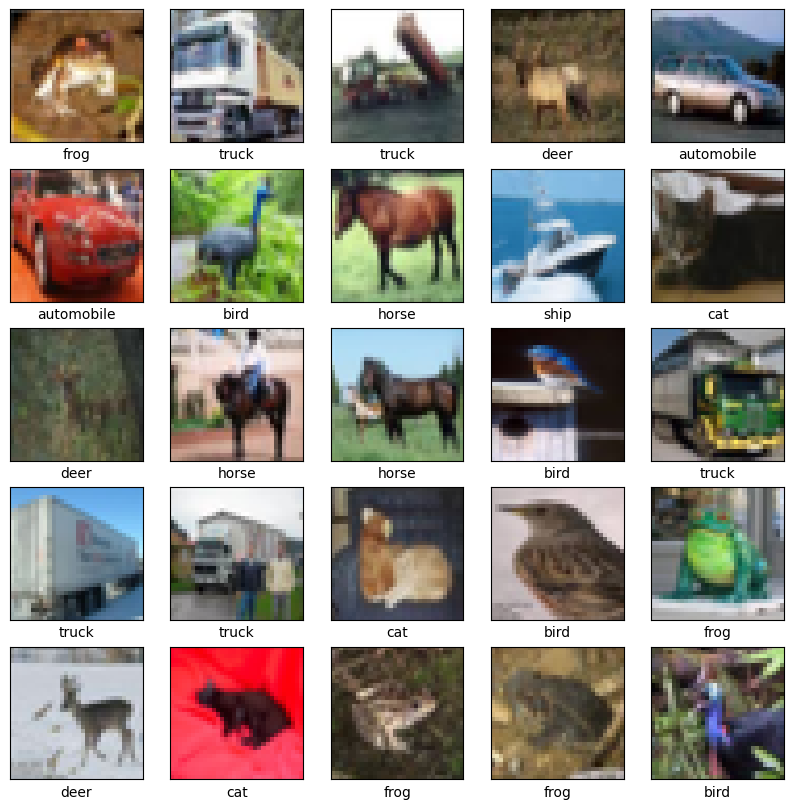

In [ ]:
import matplotlib.pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model_Q1_A1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32,3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [ ]:
model_Q1_A1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

history_Q1_A1 = model_Q1_A1.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels))

# Obtain validation accuracy from history
val_accuracy = history_Q1_A1.history['val_accuracy']  # Validation accuracy

# Evaluate the model
predicted_labels_Q1_A1 = model_Q1_A1.predict(test_images)
predicted_classes_Q1_A1 = predicted_labels_Q1_A1.argmax(axis=1)
true_classes_Q1_A1 = test_labels.argmax(axis=1)

# Calculate accuracy using scikit-learn
from sklearn.metrics import  accuracy_score ,precision_score, recall_score, f1_score

accuracy_Q1_A1 = accuracy_score(true_classes_Q1_A1, predicted_classes_Q1_A1)
precision_Q1_A1 = precision_score(true_classes_Q1_A1, predicted_classes_Q1_A1, average='weighted')
recall_Q1_A1 = recall_score(true_classes_Q1_A1, predicted_classes_Q1_A1, average='weighted')
f1_Q1_A1 = f1_score(true_classes_Q1_A1, predicted_classes_Q1_A1, average='weighted')

print(f"Validation Accuracy (from Keras): {val_accuracy[-1]}")
print(f"Accuracy (from scikit-learn): {accuracy_Q1_A1}")
print(f"Precision: {precision_Q1_A1}")
print(f"Recall: {recall_Q1_A1}")
print(f"F1 Score: {f1_Q1_A1}")

Epoch 1/3
1563/1563 [==============================] - 26s 15ms/step - loss: 1.8744 - accuracy: 0.3188 - val_loss: 1.7728 - val_accuracy: 0.3522
Epoch 2/3
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6940 - accuracy: 0.3910 - val_loss: 1.6242 - val_accuracy: 0.4216
Epoch 3/3
313/313 [==============================] - 1s 4ms/step
Validation Accuracy (from Keras): 0.4359000027179718
Accuracy (from scikit-learn): 0.1638
Precision: 1.0
Recall: 0.1638
F1 Score: 0.2814916652345764


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


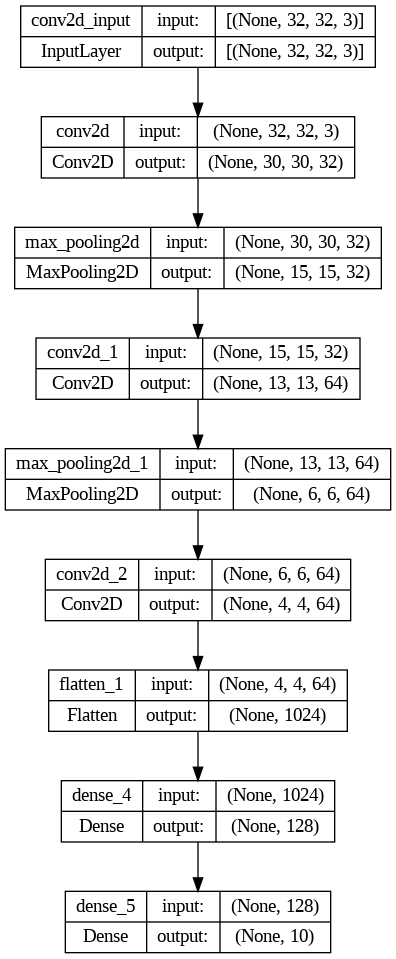

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
model_Q1_B1 = models.Sequential()
model_Q1_B1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_Q1_B1.add(layers.MaxPooling2D((2, 2)))
model_Q1_B1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_Q1_B1.add(layers.MaxPooling2D((2, 2)))
model_Q1_B1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_Q1_B1.add(layers.Flatten())
model_Q1_B1.add(layers.Dense(128, activation='relu'))
model_Q1_B1.add(layers.Dense(10))

tf.keras.utils.plot_model(model_Q1_B1, show_shapes=True)

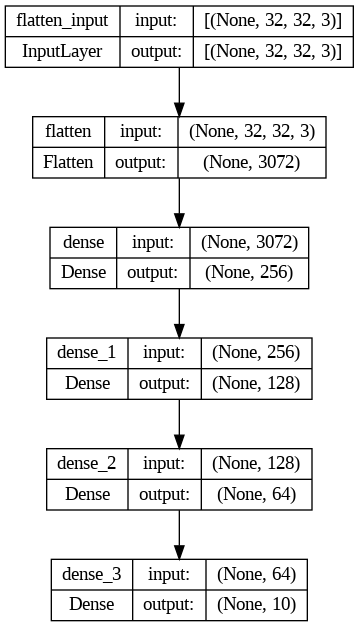

In [ ]:
tf.keras.utils.plot_model(model_Q1_A1,  show_shapes=True)

In [ ]:
model_Q1_B1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
model_Q1_B1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_Q1_B1 = model_Q1_B1.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels))

Epoch 1/3
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5133 - accuracy: 0.4489 - val_loss: 1.2952 - val_accuracy: 0.5358
Epoch 2/3
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1385 - accuracy: 0.5949 - val_loss: 1.1088 - val_accuracy: 0.6097
Epoch 3/3
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9883 - accuracy: 0.6533 - val_loss: 0.9674 - val_accuracy: 0.6588


In [ ]:
# !pip install --upgrade tensorflow

In [ ]:
# pip install scikeras

In [ ]:
# from tensorflow.keras import models, layers
# # from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.utils import to_categorical

# # Define the model creation function
# def create_model(optimizer='adam', kernel_size=(3, 3), filters=32):
#     # Build and compile the model
#     model_Q1_B2 = models.Sequential()
#     model_Q1_B2.add(layers.Conv2D(16, kernel_size, activation='relu', input_shape=(32, 32, 3)))
#     model_Q1_B2.add(layers.MaxPooling2D((2, 2)))
#     # model_Q1_B2.add(layers.Conv2D(16, kernel_size, activation='relu'))
#     # model_Q1_B2.add(layers.MaxPooling2D((2, 2)))
#     model_Q1_B2.add(layers.Conv2D(32, kernel_size, activation='relu'))
#     model_Q1_B2.add(layers.Flatten())
#     model_Q1_B2.add(layers.Dense(128, activation='relu'))
#     model_Q1_B2.add(layers.Dense(10, activation='softmax'))

#     model_Q1_B2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model_Q1_B2

# # Convert labels to one-hot encoding
# train_labels_one_hot = to_categorical(train_labels)

# # Create the KerasClassifier for use in GridSearchCV
# model_Q1_B2 = KerasClassifier(build_fn=create_model, epochs=1, batch_size=32, verbose=0,filters = 32,kernel_size=(3, 3))

# # Define the hyperparameter grid
# param_grid = {
#     'optimizer': ['adam', 'sgd'],
#     'kernel_size': [(3, 3), (5, 5)],
#     'filters': [32, 64, 128]
# }

# # Perform Grid Search
# grid = GridSearchCV(estimator=model_Q1_B2, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(train_images, train_labels_one_hot)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    """Learning Rate Schedule"""
    return 0.001 * (0.1 ** int(epoch / 1))

lr_scheduler = LearningRateScheduler(lr_schedule)

model_Q1_B1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_q1_b1 = model_Q1_B1.fit(train_images, train_labels, epochs=3, callbacks=[lr_scheduler],validation_data=(test_images, test_labels))

Epoch 1/3
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8837 - accuracy: 0.6895 - val_loss: 0.9442 - val_accuracy: 0.6685 - lr: 0.0010
Epoch 2/3
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7083 - accuracy: 0.7520 - val_loss: 0.8421 - val_accuracy: 0.7042 - lr: 1.0000e-04
Epoch 3/3
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6691 - accuracy: 0.7669 - val_loss: 0.8311 - val_accuracy: 0.7109 - lr: 1.0000e-05


In [ ]:
# varying number of hidden layers and number of neurons.
model_Q1_C1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32,3)),
    # tf.keras.layers.Dense(2048, activation='relu'),
    # tf.keras.layers.Dense(1024, activation='relu'),
    # tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
# tf.keras.utils.plot_model(model_Q1_C1, show_shapes=True)

In [ ]:
model_Q1_C1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

history_Q1_C1 = model_Q1_C1.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels))

# Obtain validation accuracy from history
val_accuracy_Q1_C1 = history_Q1_C1.history['val_accuracy']  # Validation accuracy

Epoch 1/3
1563/1563 [==============================] - 27s 17ms/step - loss: 2.1449 - accuracy: 0.1751 - val_loss: 2.0401 - val_accuracy: 0.1932
Epoch 2/3
1563/1563 [==============================] - 21s 13ms/step - loss: 1.8965 - accuracy: 0.2873 - val_loss: 1.7871 - val_accuracy: 0.3559
Epoch 3/3
1563/1563 [==============================] - 21s 14ms/step - loss: 1.7409 - accuracy: 0.3637 - val_loss: 1.6733 - val_accuracy: 0.3942
